In [37]:
import numpy as np

def velocities(mu,lamda,rho): 
    vs = np.sqrt(mu/rho)
    vp = np.sqrt((lamda+2*mu)/rho)
    return [vp,vs]
def mu_lamda(E,K,sigma): 
    mu = E/(2*(1+sigma))
    lamda = E*sigma/((1+sigma)*(1-2*sigma))
    return [mu,lamda]
def K_sig_E(lamda,mu):
    E = mu*((3*lamda+2*mu)/(lamda+mu))
    sigma = lamda/(2*(lamda+mu))
    K = lamda+2/3*mu
    return [E,sigma,K]
    
    
def elastic_moduli(vp=np.nan,vs=np.nan,rho=np.nan,E=np.nan,sigma=np.nan,K=np.nan,mu=np.nan,lamda=np.nan):
    if (~np.isnan(E) & ~np.isnan(sigma)):#1
        K = E/(3*(1-2*sigma))
        [mu,lamda] = mu_lamda(E,K,sigma)
        return np.array([E,sigma,K,mu,lamda,*velocities(mu,lamda,rho),rho])
    
    if (~np.isnan(E) & ~np.isnan(K)): #2
        sigma = (3*K-E)/(6*k)
        [mu,lamda] = mu_lamda(E,K,sigma)
        return np.array([E,sigma,K,mu,lamda,*velocities(mu,lamda,rho),rho])
    
    if (~np.isnan(E) & ~np.isnan(mu)): #3
        sigma = (E-2*mu)/(2*mu)
        K = (mu*E)/(3*(3*mu-E))
        [mu,lamda] = mu_lamda(E,K,sigma)
        return np.array([E,sigma,K,mu,lamda,*velocities(mu,lamda,rho),rho])
    
    if (~np.isnan(sigma) & ~np.isnan(K)): #4
        E = 3*K*(1-2*sigma)
        [mu,lamda] = mu_lamda(E,K,sigma)
        return np.array([E,sigma,K,mu,lamda,*velocities(mu,lamda,rho),rho]) 
    
    if (~np.isnan(sigma) & ~np.isnan(mu)): #5
        lamda = mu*(2*sigma/(1-2*sigma))
        [E,sigma,K] = K_sig_E(lamda,mu)
        return np.array([E,sigma,K,mu,lamda,*velocities(mu,lamda,rho),rho])
    
    if (~np.isnan(sigma) & ~np.isnan(lamda)): #6 
        mu = lamda*((1-2+sigma)/(2*sigma))
        [E,sigma,K] = K_sig_E(lamda,mu)
        return np.array([E,sigma,K,mu,lamda,*velocities(mu,lamda,rho),rho])
    
    if (~np.isnan(K) & ~np.isnan(mu)):#7
        lamda = K-2*mu/3
        [E,sigma,K] = K_sig_E(lamda,mu)
        return np.array([E,sigma,K,mu,lamda,*velocities(mu,lamda,rho),rho])
    
    if (~np.isnan(K) & ~np.isnan(lamda)):#8
        mu = 1.5*(K-lamda)
        [E,sigma,K] = K_sig_E(lamda,mu)
        return np.array([E,sigma,K,mu,lamda,*velocities(mu,lamda,rho),rho])
    
    if (~np.isnan(mu) & ~np.isnan(lamda)):#9
        [E,sigma,K] = K_sig_E(lamda,mu)
        return np.array([E,sigma,K,mu,lamda,*velocities(mu,lamda,rho),rho])
    
    if (~np.isnan(vp) & ~np.isnan(vs) & ~np.isnan(rho)):#10
        mu = rho*vs**2
        lamda = rho*vp**2 - 2*mu
        [E,sigma,K] = K_sig_E(lamda,mu)
        return np.array([E,sigma,K,mu,lamda,*velocities(mu,lamda,rho),rho])

elastic_moduli(E= 16*10**9,sigma = .34,rho=1900)

array([1.60000000e+10, 3.40000000e-01, 1.66666667e+10, 5.97014925e+09,
       1.26865672e+10, 3.60020947e+03, 1.77262061e+03, 1.90000000e+03])

Text(0, 0.5, 'Vs-Geschwindigkeit')

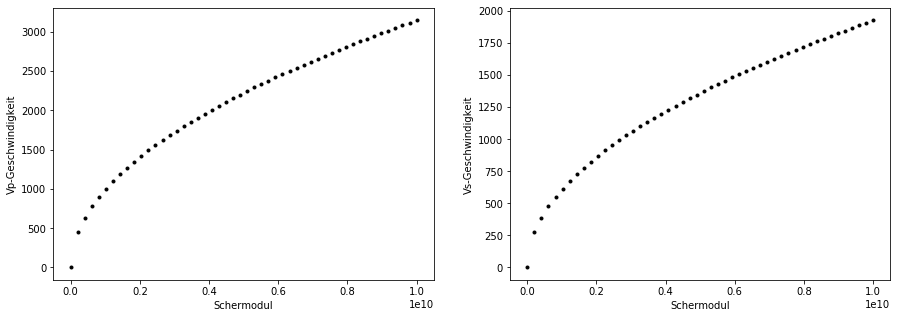

In [74]:
import matplotlib.pyplot as plt

fig,ax = plt.subplots(1,2,figsize=(15,5))
for i in np.linspace(1,1*10**10):
    popt = elastic_moduli(sigma = 0.2, mu=i,rho=2700)
    ax[0].plot(i,popt[5],'k.')
    ax[1].plot(i,popt[6],'k.')    
ax[0].set_xlabel('Schermodul')
ax[1].set_xlabel('Schermodul')
ax[0].set_ylabel('Vp-Geschwindigkeit')
ax[1].set_ylabel('Vs-Geschwindigkeit')


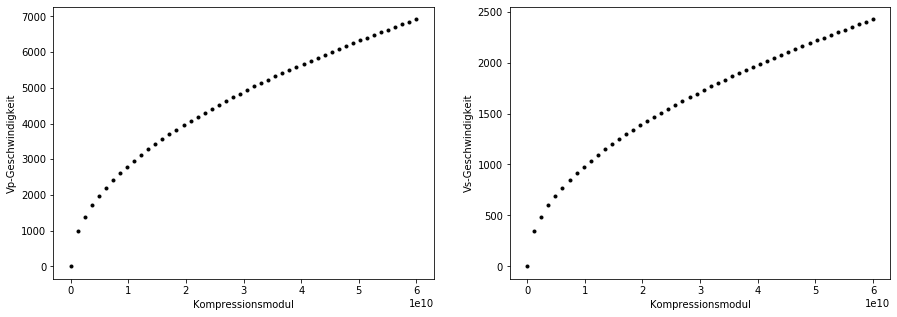

In [69]:
import matplotlib.pyplot as plt

fig,ax = plt.subplots(1,2,figsize=(15,5))
for i in np.linspace(1,6.*10**10):
    popt = elastic_moduli(sigma =0.43, K=i,rho=1500)
    ax[0].plot(i,popt[5],'k.')
    ax[1].plot(i,popt[6],'k.')    
ax[0].set_xlabel('Kompressionsmodul')
ax[1].set_xlabel('Kompressionsmodul')
ax[0].set_ylabel('Vp-Geschwindigkeit')
ax[1].set_ylabel('Vs-Geschwindigkeit')
plt.show()